Exercise 01:

(8, 8)


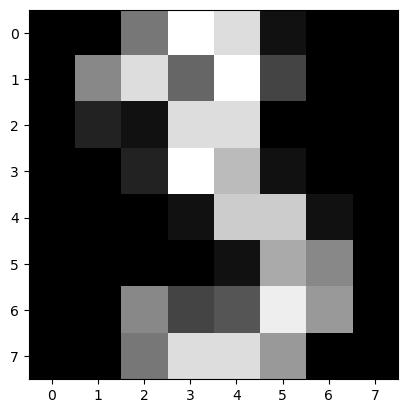

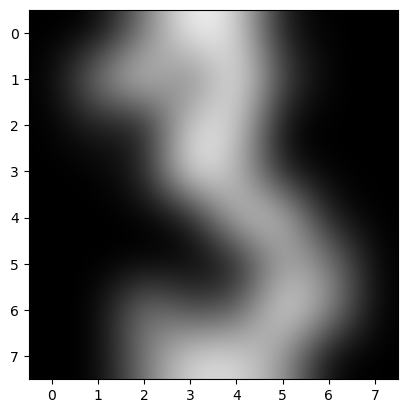

In [11]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(np.shape(images[0]))
#The images are of size 8x8 

#Interpolate using nearest neighbor
img_nearest = images[3]
assert 2 == len (img_nearest.shape)
plt.figure()
plt.gray()
plt.imshow(img_nearest,interpolation = "nearest" ) # also try interpolation =" bicubic "
plt.show()

#Interpolate using bicubic
img_bicubic = images[3]
assert 2 == len (img_bicubic.shape)
plt.figure()
plt.gray()
plt.imshow(img_bicubic,interpolation = "bicubic" ) # also try interpolation =" bicubic "
plt.show()

x_3and9 = []
y_3and9 = []
image_3and9 = []
for i in range(len(data)):
    if target[i] == 3 or target[i] == 9:
        x_3and9.append(data[i])
        y_3and9.append(target[i]) 
        image_3and9.append(images[i])

X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(x_3and9, y_3and9, test_size = 0.4, random_state = 0)


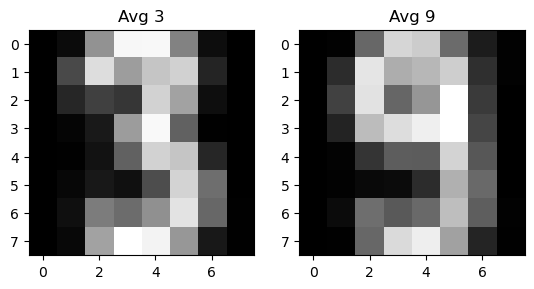

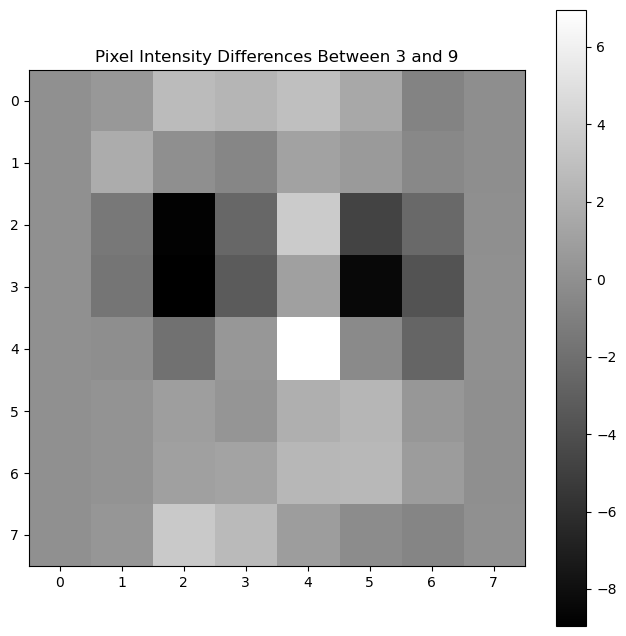

In [12]:
avg_digit_3 = np.mean(data[target == 3], axis=0)
avg_digit_9 = np.mean(data[target == 9], axis=0)
difference = avg_digit_3 - avg_digit_9

plt.subplot(1, 2, 1)
plt.imshow(avg_digit_3.reshape(8, 8), cmap='gray', interpolation='none')
plt.title('Avg 3')
plt.subplot(1, 2, 2)
plt.imshow(avg_digit_9.reshape(8, 8), cmap='gray', interpolation='none')
plt.title('Avg 9')
plt.show()
plt.figure(figsize=(8, 8))
plt.imshow(difference.reshape(8, 8), cmap='gray', interpolation='none')  
plt.colorbar()
plt.title('Pixel Intensity Differences Between 3 and 9')
plt.show()

In [13]:

# Define the pixel indices that best distinguish between 3 and 9
pixel_1 = 26  # Row 3, Column 2 (0-indexed)
pixel_2 = 36  # Row 4, Column 4 (0-indexed)

# Function to extract 2D features
def features2d(x):
    f1 = x[:, pixel_1]  # Feature 1
    f2 = x[:, pixel_2]  # Feature 2
    features = np.column_stack((f1, f2))
    return features


In [18]:
# Convert list to numpy arrays for easier processing with scikit-learn and matplotlib
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

# Extract 2D features for training data
X_train_2d = features2d(X_train_array)




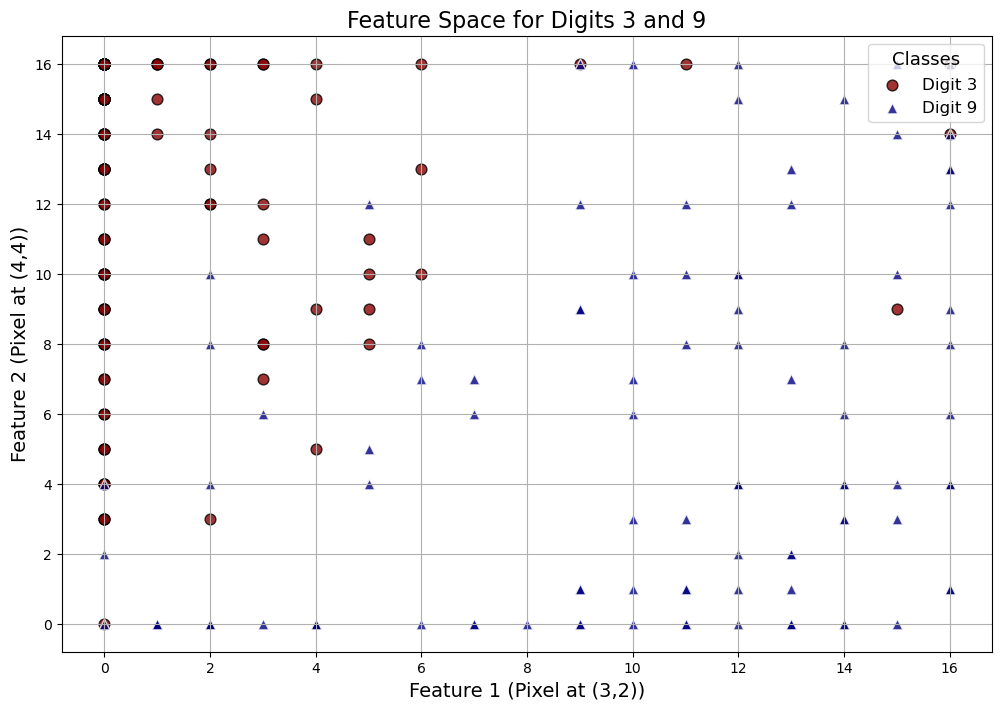

In [15]:
plt.figure(figsize=(12, 8))

# Plot for class '3'
plt.scatter(X_train_2d[y_train_array == 3][:, 0], X_train_2d[y_train_array == 3][:, 1], 
            color='darkred', marker='o', edgecolor='black', s=60, alpha=0.8, label='Digit 3')

# Plot for class '9'
plt.scatter(X_train_2d[y_train_array == 9][:, 0], X_train_2d[y_train_array == 9][:, 1], 
            color='navy', marker='^', edgecolor='white', s=60, alpha=0.8, label='Digit 9')

# Label the axes with clear descriptions
plt.xlabel('Feature 1 (Pixel at (3,2))', fontsize=14)
plt.ylabel('Feature 2 (Pixel at (4,4))', fontsize=14)

# Set a descriptive title for the plot
plt.title('Feature Space for Digits 3 and 9', fontsize=16)

# Add a legend to help identify the classes
plt.legend(title='Classes', title_fontsize='13', fontsize='12', loc='upper right')

# Enable grid for better alignment
plt.grid(True)

# Display the plot
plt.show()


In [19]:

# Convert list to numpy arrays for easier processing with scikit-learn and matplotlib
X_test_array = np.array(X_test)

# Extract 2D features for test data
X_test_2d = features2d(X_test_array)

# Adjust labels to -1 for '3' and 1 for '9'
def adjust_labels(labels):
    return np.where(labels == 3, -1, 1)

y_train_labels = adjust_labels(y_train_array)
y_test_labels = adjust_labels(y_test)

# Define the nearest mean classifier
def nearest_mean_classifier(train_features, train_labels, test_features):
    mean_digit_3 = np.mean(train_features[train_labels == -1], axis=0)
    mean_digit_9 = np.mean(train_features[train_labels == 1], axis=0)
    
    predicted_labels = []
    for feature in test_features:
        dist_to_3 = np.linalg.norm(feature - mean_digit_3)
        dist_to_9 = np.linalg.norm(feature - mean_digit_9)
        predicted_label = -1 if dist_to_3 < dist_to_9 else 1
        predicted_labels.append(predicted_label)
    
    return np.array(predicted_labels)

# Classify training and test datasets
predicted_train_labels = nearest_mean_classifier(X_train_2d, y_train_labels, X_train_2d)
predicted_test_labels = nearest_mean_classifier(X_train_2d, y_train_labels, X_test_2d)

# Calculate classification error
def classification_error(true_labels, predicted_labels):
    return np.mean(true_labels != predicted_labels)

train_error = classification_error(y_train_labels, predicted_train_labels)
test_error = classification_error(y_test_labels, predicted_test_labels)

# Print the errors
print(f"Training Error: {train_error:.2f}")
print(f"Testing Error: {test_error:.2f}")

Training Error: 0.07
Testing Error: 0.47


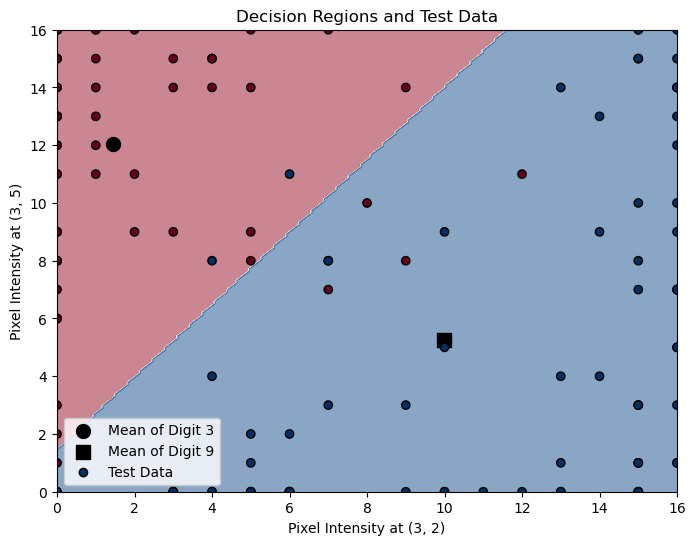

In [8]:

# Create a grid of points in the feature space
x1_min, x1_max = X_train_2d[:, 0].min(), X_train_2d[:, 0].max()
x2_min, x2_max = X_train_2d[:, 1].min(), X_train_2d[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200), np.linspace(x2_min, x2_max, 200))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Predict class for each point on the grid
predicted_labels = nearest_mean(X_train_2d, y_train_adjusted, grid_points).reshape(xx1.shape)

# Plot the decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, predicted_labels, alpha=0.5, cmap='RdBu')

# Plot class means
mean_digit_3 = np.mean(X_train_2d[y_train_adjusted == -1], axis=0)
mean_digit_9 = np.mean(X_train_2d[y_train_adjusted == 1], axis=0)
plt.scatter(mean_digit_3[0], mean_digit_3[1], c='black', marker='o', s=100, label='Mean of Digit 3')
plt.scatter(mean_digit_9[0], mean_digit_9[1], c='black', marker='s', s=100, label='Mean of Digit 9')

# Plot test data points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_adjusted, cmap='RdBu', edgecolors='k', label='Test Data')

# Add labels and legend
plt.xlabel('Pixel Intensity at (3, 2)')
plt.ylabel('Pixel Intensity at (3, 5)')
plt.title('Decision Regions and Test Data')
plt.legend()

plt.show()